Notebook Kaggle usado como base para estudo [world-energy-consumption-trends-analysis](https://www.kaggle.com/code/sakshigoyaln/world-energy-consumption-trends-analysis)

## Bibliotecas para testes e estudo

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# path para o arquivo de input
df = pd.read_csv('./input/World Energy Consumption.csv')
global_energy = df.groupby('year')['primary_energy_consumption'].sum().reset_index()

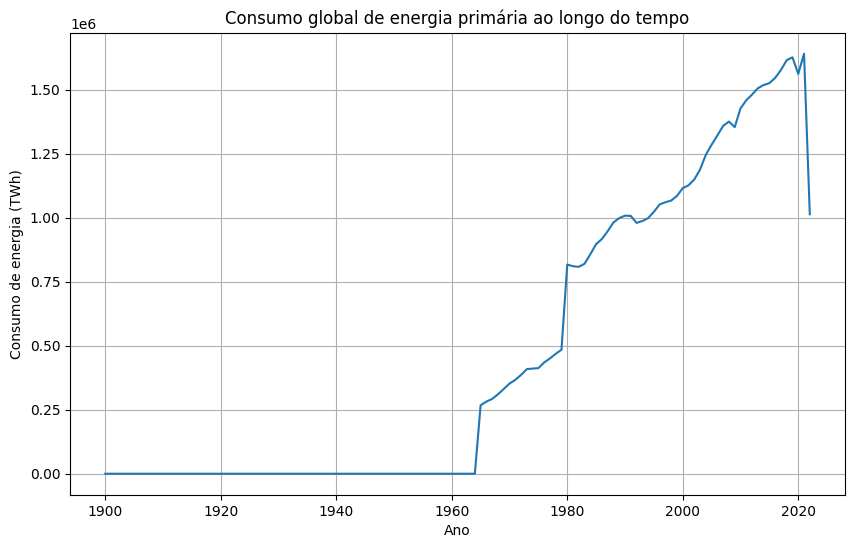

In [ ]:
# grafico do consumo de energia primaria ao longo do tempo
plt.figure(figsize=(10,6))
sns.lineplot(data=global_energy, x='year', y='primary_energy_consumption')
plt.title('Consumo global de energia primária ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('Consumo de energia (TWh)')
plt.grid(True)
plt.show()

In [94]:
# %pip install prophet

Prophet é uma biblioteca Python de código aberto criada pelo Meta (Facebook) para realizar previsões de séries temporais de forma automatizada e intuitiva. Ela é projetada para lidar bem com dados que possuem fortes efeitos sazonais e também é robusta a valores ausentes, outliers e mudanças na tendência. É ideal para dados com sazonalidade diária, semanal e anual, e pode incluir feriados e outros eventos especiais. 

19:42:47 - cmdstanpy - INFO - Chain [1] start processing


Primeiro ano com consumo > 0: 1965


19:42:48 - cmdstanpy - INFO - Chain [1] done processing


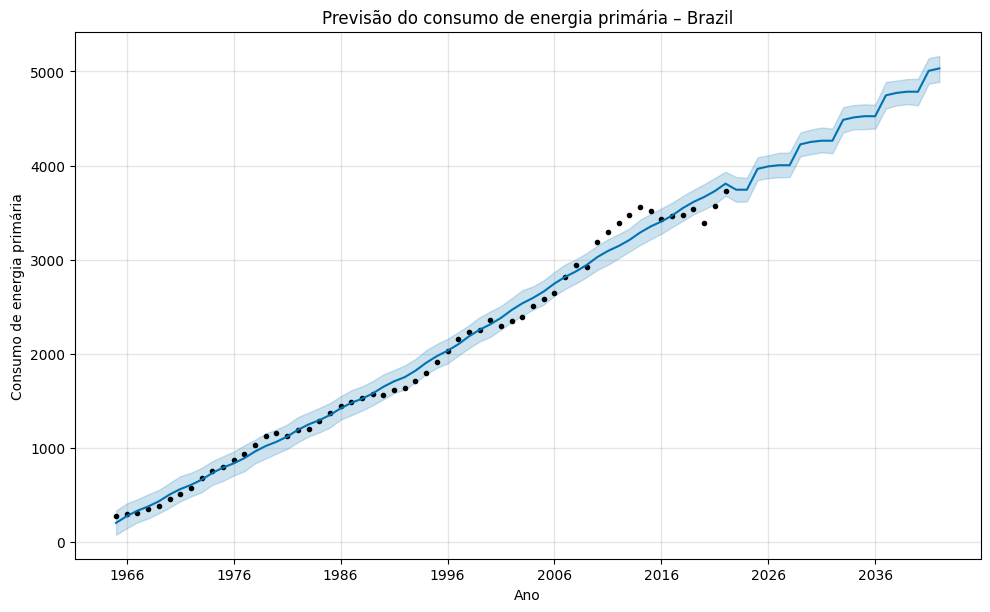

In [ ]:
# testes com prophet

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

pais = 'Brazil'

# 1) Filtra o país
dados_pais = df[df['country'] == pais]

# 2) Encontra o primeiro ano com consumo > 0
primeiro_ano_valido = dados_pais.loc[
    dados_pais['primary_energy_consumption'] > 0, 'year'
].min()

print("Primeiro ano com consumo > 0:", primeiro_ano_valido)

# 3) Filtra os dados apenas a partir desse ano
dados_validos = dados_pais[
    dados_pais['year'] >= primeiro_ano_valido
][['year', 'primary_energy_consumption']].dropna()

# Prophet EXIGE os nomes 'ds' e 'y'
dados_validos = dados_validos.rename(columns={
    'year': 'ds',                         # datas
    'primary_energy_consumption': 'y'     # valores
})

# Conversão para datetime
dados_validos['ds'] = pd.to_datetime(dados_validos['ds'], format='%Y')

# 4) Cria e treina o modelo
modelo = Prophet()
modelo.fit(dados_validos)

# 5) Gera datas futuras
datas_futuras = modelo.make_future_dataframe(periods=20, freq='YE')

# 6) Faz previsão
previsoes = modelo.predict(datas_futuras)

# 7) Plota
modelo.plot(previsoes)
plt.title(f"Previsão do consumo de energia primária – {pais}")
plt.xlabel("Ano")
plt.ylabel("Consumo de energia primária")
plt.show()


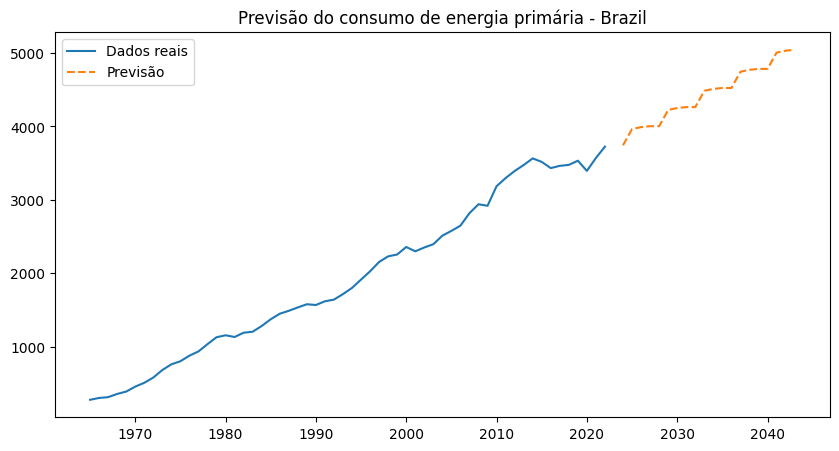

In [96]:
ultimo_ano = dados_validos['ds'].max().year
anos_futuros = pd.date_range(start=f'{ultimo_ano+1}-12-31', periods=20, freq='YE')

future = pd.DataFrame({'ds': anos_futuros})

# Previsão
previsoes = modelo.predict(future)

# Plot apenas do período com previsão
plt.figure(figsize=(10,5))
plt.plot(dados_validos['ds'], dados_validos['y'], label='Dados reais')
plt.plot(previsoes['ds'], previsoes['yhat'], label='Previsão', linestyle='--')
plt.title(f'Previsão do consumo de energia primária - {pais}')
plt.legend()
plt.show()
